# Linear Regression — Notebook (Easy–Medium)


## Learning outcomes
- Understand the linear regression problem (simple and multiple).
- Perform exploratory data analysis (EDA) and interpret relationships.
- Fit models using scikit-learn and derive the closed-form (normal equation).
- Implement gradient descent for linear regression from scratch.
- Work with polynomial features and regularization (Ridge, Lasso).
- Evaluate models using MSE, RMSE, MAE, and R²; visualize residuals.

## Notebook structure
1. Setup & dataset
2. EDA & visualization
3. Simple linear regression (single feature)
4. Multiple linear regression (all features)
5. Closed-form (normal equation) vs scikit-learn
6. Gradient descent implementation
7. Polynomial features
8. Regularization: Ridge & Lasso
9. Model comparison and tips
10. Exercises & further reading

**Dataset used:** `diabetes` (from `sklearn.datasets`) — a classic small regression dataset.

----

All code cells are runnable. If you want the notebook adjusted (more/less detail, different dataset, or a second notebook for Logistic Regression), tell me and I will create it.

In [ ]:
# Setup: imports and configuration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# display settings
pd.options.display.float_format = '{:0.4f}'.format
np.set_printoptions(precision=4, suppress=True)

print('Ready — libraries imported')

Ready — libraries imported


## 1) Load dataset and construct DataFrame
We use the `diabetes` dataset from `sklearn`. We'll convert it into a `pandas.DataFrame` (features + target) so we can explore it easily.

In [ ]:
# Load dataset and build DataFrame
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
df = pd.concat([X, y], axis=1)

print('Dataset shape:', df.shape)
print('\nFeature names:', list(df.columns[:-1]))

df.head()

Dataset shape: (442, 11)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['bp'].plot(kind='hist', bins=20, title='bp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sex', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='bmi', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='bp', y='s1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['bp'].plot(kind='line', figsize=(8, 4), title='bp')
plt.gca().spines[['top', 'right']].set_visible(False)

### Quick summary statistics
Look at distribution, mean, std, min/max for each feature and the target.

In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


### Correlation matrix
We compute correlations (Pearson) between features and the target. This helps pick candidate features for simple linear regression.

Top correlations with target:
target   1.0000
bmi      0.5865
s5       0.5659
bp       0.4415
s4       0.4305
s3       0.3948
s6       0.3825
s1       0.2120
age      0.1879
s2       0.1741
Name: target, dtype: float64


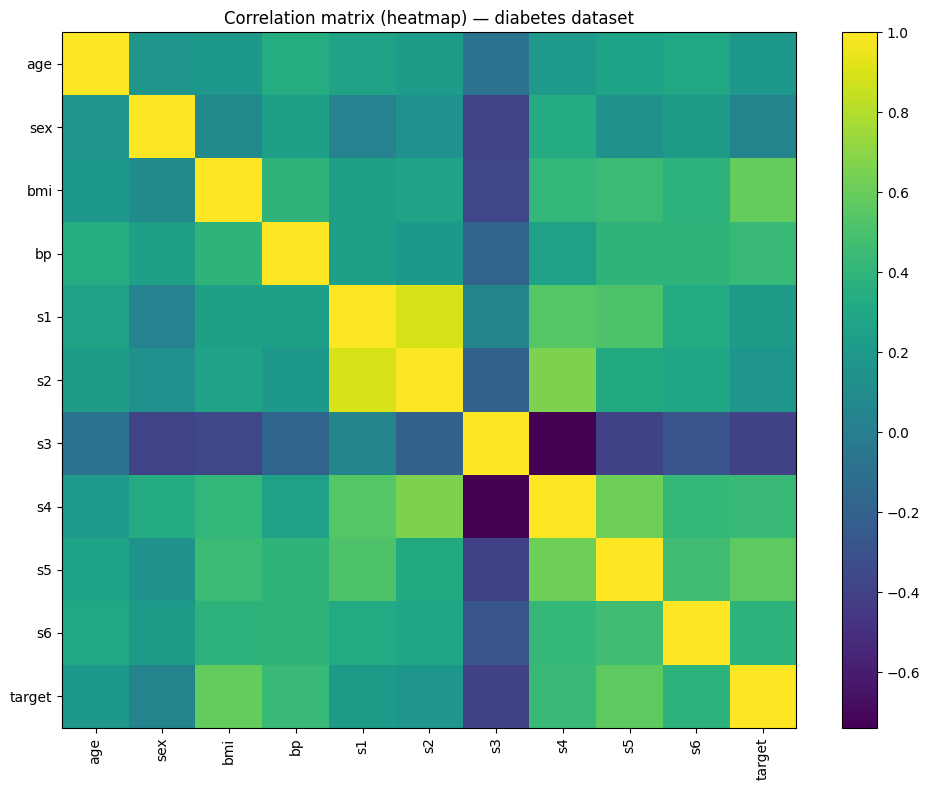

In [ ]:
# Correlation matrix
corr = df.corr()
# show top correlations with target
corr_target = corr['target'].abs().sort_values(ascending=False)
print('Top correlations with target:')
print(corr_target.head(10))

# Plot heatmap using matplotlib
plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation matrix (heatmap) — diabetes dataset')
plt.tight_layout()
plt.show()

### Scatter plot — `bmi` vs `target`
We'll start with a simple linear regression example predicting `target` from `bmi` (one feature).

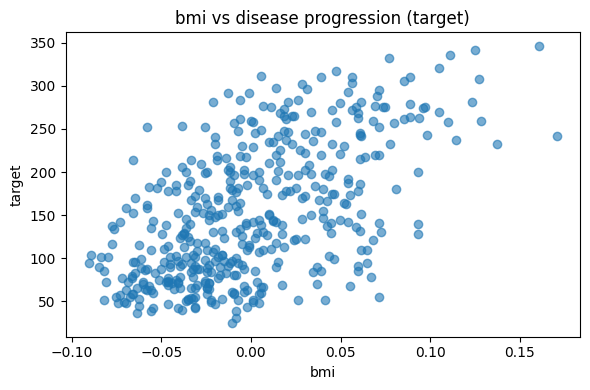

In [ ]:
# Scatter plot: bmi vs target
plt.figure(figsize=(6,4))
plt.scatter(df['bmi'], df['target'], alpha=0.6)
plt.xlabel('bmi')
plt.ylabel('target')
plt.title('bmi vs disease progression (target)')
plt.tight_layout()
plt.show()

## 2) Simple Linear Regression (single feature)
We'll fit a `LinearRegression` model using `bmi` only. We'll demonstrate training, prediction, metrics, and visualize the regression line and residuals.

Intercept: 152.00335421448167
Coefficient for bmi: 998.5776891375598
MSE: 4061.826, RMSE: 63.732, MAE: 52.260, R2: 0.233


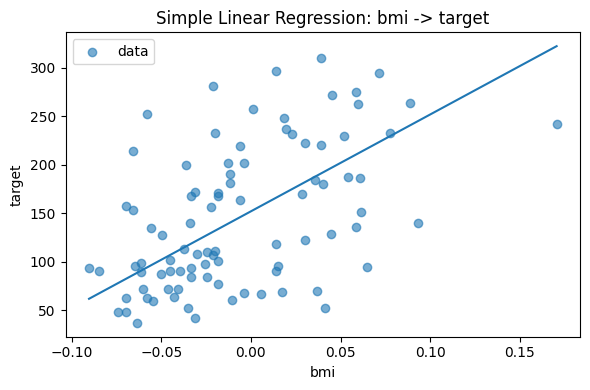

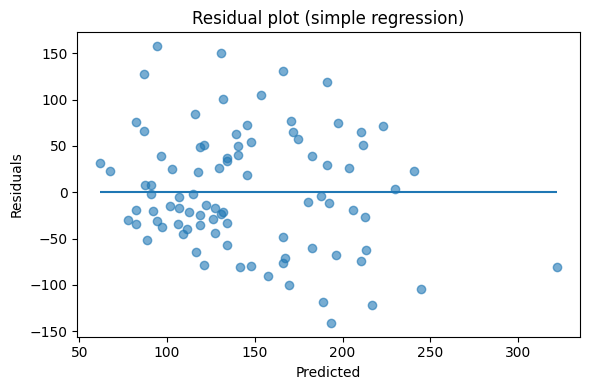

In [ ]:
# Prepare data (single feature)
X_bmi = df[['bmi']].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept:', model.intercept_)
print('Coefficient for bmi:', model.coef_[0])

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:0.3f}, RMSE: {rmse:0.3f}, MAE: {mae:0.3f}, R2: {r2:0.3f}')

# Plot line + points
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, alpha=0.6, label='data')
# regression line (plot over range)
xs = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)
ys = model.predict(xs)
plt.plot(xs, ys)
plt.xlabel('bmi')
plt.ylabel('target')
plt.title('Simple Linear Regression: bmi -> target')
plt.legend()
plt.tight_layout()
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max())
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot (simple regression)')
plt.tight_layout()
plt.show()

## 3) Multiple Linear Regression (all features)
Now we'll use all features to build a more expressive model.

In [ ]:
# Prepare data (all features)
X_all = df.drop(columns=['target']).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

model_all = LinearRegression()
model_all.fit(X_train, y_train)

y_pred_all = model_all.predict(X_test)

print('Metrics (all features):')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_all)))
print('R2:', r2_score(y_test, y_pred_all))

# Show coefficients aligned with feature names
coef_df = pd.DataFrame({'feature': data.feature_names, 'coefficient': model_all.coef_})
coef_df = coef_df.sort_values(by='coefficient', key=lambda x: x.abs(), ascending=False)
coef_df

Metrics (all features):
RMSE: 53.85344583676593
R2: 0.4526027629719195


,feature,coefficient
4,s1,-931.4888
8,s5,736.1989
2,bmi,542.4288
5,s2,518.0623
3,bp,347.7038
7,s4,275.3179
1,sex,-241.9644
6,s3,163.4200
9,s6,48.6707
0,age,37.9040


## 4) Closed-form solution (Normal Equation)
For linear regression, the closed-form solution is \(\theta = (X^T X)^{-1} X^T y\) (with a column of ones for intercept). We'll compute this and compare to scikit-learn coefficients.

In [ ]:
# Add intercept column and compute closed-form solution
X = np.hstack([np.ones((X_all.shape[0],1)), X_all])  # shape (n, p+1)
theta_closed = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)  # pseudo-inverse for stability

print('Closed-form intercept:', theta_closed[0])
print('Closed-form coefficients (first 5):', theta_closed[1:6])

# Compare to scikit-learn (note sklearn fits intercept separately)
sk_intercept = model_all.intercept_
sk_coefs = model_all.coef_
print('\nsklearn intercept:', sk_intercept)
print('coefs close? max abs diff:', np.max(np.abs(sk_coefs - theta_closed[1:])))

Closed-form intercept: 152.13348416289594
Closed-form coefficients (first 5): [ -10.0099 -239.8156  519.8459  324.3846 -792.1756]

sklearn intercept: 151.34560453985995
coefs close? max abs diff: 139.31320733129223


## 5) Gradient Descent from scratch
We implement batch gradient descent to minimize MSE. This is educational — in practice scikit-learn or closed-form is preferred for small problems.

GD intercept: 152.13348416289583
GD first 5 coefs: [ -0.4738 -11.4043  24.7324  15.4271 -37.1786]


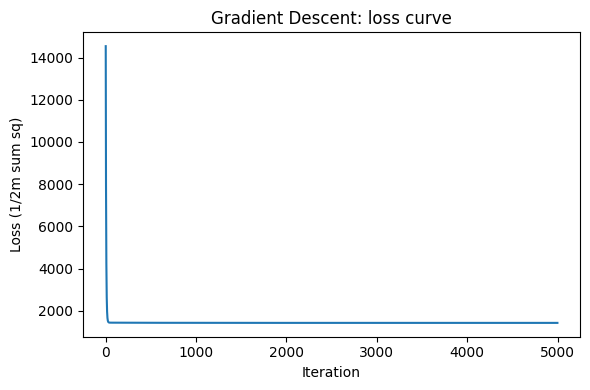

GD vs sklearn (RMSE on whole dataset):
GD RMSE: 53.476168693429145
sklearn RMSE (all-data): 53.6182939258827


In [ ]:
def gradient_descent(X, y, lr=0.01, n_iter=1000, verbose=False):
    # X should already include intercept column
    m, n = X.shape
    theta = np.zeros(n)
    history = []
    for i in range(n_iter):
        preds = X.dot(theta)
        error = preds - y
        grad = (1/m) * X.T.dot(error)
        theta -= lr * grad
        loss = (1/(2*m)) * np.sum(error**2)
        history.append(loss)
        if verbose and (i % (n_iter//5 + 1) == 0):
            print(f'iter {i}, loss {loss:0.4f}')
    return theta, history

# Prepare X with intercept and scaled features for better convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)
X_gd = np.hstack([np.ones((X_scaled.shape[0],1)), X_scaled])

theta_gd, hist = gradient_descent(X_gd, y, lr=0.1, n_iter=5000)

print('GD intercept:', theta_gd[0])
print('GD first 5 coefs:', theta_gd[1:6])

plt.figure(figsize=(6,4))
plt.plot(hist)
plt.xlabel('Iteration')
plt.ylabel('Loss (1/2m sum sq)')
plt.title('Gradient Descent: loss curve')
plt.tight_layout()
plt.show()

# Compare predictions from GD to sklearn (on scaled features we must adjust)
# Calculate predictions using theta_gd on scaled test set
X_test_scaled = scaler.transform(df.drop(columns=['target']).values)
X_test_gd = np.hstack([np.ones((X_test_scaled.shape[0],1)), X_test_scaled])

y_pred_gd = X_test_gd.dot(theta_gd)
print('GD vs sklearn (RMSE on whole dataset):')
print('GD RMSE:', np.sqrt(mean_squared_error(y, y_pred_gd)))
print('sklearn RMSE (all-data):', np.sqrt(mean_squared_error(y, model_all.predict(df.drop(columns=["target"]).values))))

## 6) Polynomial Features (non-linear relationships)
We'll create polynomial features for `bmi` (degree=2) and fit a linear model to show how non-linear behaviour can be captured by linear models on transformed features.

Polynomial (degree=2) metrics:
RMSE: 63.914204061942534
R2: 0.2289715971205668


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


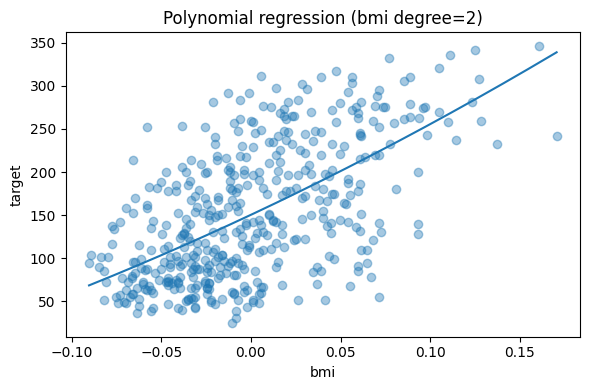

In [ ]:
# Polynomial features on bmi
pf = PolynomialFeatures(degree=2, include_bias=False)
X_bmi_poly = pf.fit_transform(df[['bmi']])

X_train, X_test, y_train, y_test = train_test_split(X_bmi_poly, y, test_size=0.2, random_state=42)
model_poly = LinearRegression().fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

print('Polynomial (degree=2) metrics:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print('R2:', r2_score(y_test, y_pred_poly))

# Plot predictions vs actual
xs = np.linspace(df['bmi'].min(), df['bmi'].max(), 200)
xs_poly = pf.transform(xs.reshape(-1,1))
ys = model_poly.predict(xs_poly)

plt.figure(figsize=(6,4))
plt.scatter(df['bmi'], df['target'], alpha=0.4)
plt.plot(xs, ys)
plt.xlabel('bmi')
plt.ylabel('target')
plt.title('Polynomial regression (bmi degree=2)')
plt.tight_layout()
plt.show()

## 7) Regularization: Ridge & Lasso
We'll compare unregularized linear regression to Ridge and Lasso (L2 and L1 regularization). Regularization helps when multicollinearity exists or when you want to control coefficient sizes.

In [ ]:
# Standardize features for regularized models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['target']).values)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train)

models = {'Linear': lm, 'Ridge': ridge, 'Lasso': lasso}
rows = []
for name, m in models.items():
    y_pred = m.predict(X_test)
    rows.append({'model': name,
                 'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
                 'r2': r2_score(y_test, y_pred)})

pd.DataFrame(rows).set_index('model')

,rmse,r2
model,,
Linear,53.8534,0.4526
Ridge,53.7776,0.4541
Lasso,53.7080,0.4556


## 8) Model comparison & interpreting coefficients
Look at coefficients for each model (after scaling) to compare effect sizes. For Lasso, some coefficients may be shrunk to zero.

In [ ]:
coef_df = pd.DataFrame({
    'feature': data.feature_names,
    'Linear_coef': lm.coef_,
    'Ridge_coef': ridge.coef_,
    'Lasso_coef': lasso.coef_
})
coef_df

,feature,Linear_coef,Ridge_coef,Lasso_coef
0,age,1.8029,1.8571,1.7749
1,sex,-11.5091,-11.4463,-11.3143
2,bmi,25.8007,25.9239,26.0171
3,bp,16.5386,16.4484,16.3601
4,s1,-44.3064,-34.5970,-29.2650
5,s2,24.6417,17.0817,13.2787
6,s3,7.7731,3.4272,0.5514
7,s4,13.0955,11.7305,10.1988
8,s5,35.0174,31.2647,29.5129
9,s6,2.3150,2.4199,2.3587


## 9) Practical tips (summary)
- Always visualize your data (scatter plots, histograms, residual plots).
- Check correlations to detect multicollinearity; consider PCA or regularization if present.
- Scale features when using gradient descent or regularization.
- Use cross-validation when choosing hyperparameters (e.g., Ridge alpha).
- For interpretability prefer simpler models; for prediction focus on validation metrics.

----


## 10) Exercises & further reading
**Exercises:**
1. Repeat the notebook using a different target: predict `bp` (blood pressure) from the same features. How do results change?
2. Implement stochastic gradient descent and compare speed/convergence to batch gradient descent.
3. Use `GridSearchCV` to find the best `alpha` for Ridge and Lasso.
4. Split dataset into train/validation/test and show learning curves.

**Further reading:**
- Hastie, Tibshirani, Friedman — *The Elements of Statistical Learning*
- Andrew Ng — *Machine Learning (Coursera)* (linear regression lectures)



In [ ]:
# Save a small sample table for quick reference
sample = df.sample(10, random_state=1).reset_index(drop=True)
try:
    # helper available in the notebook UI environment
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user('Sample rows (diabetes)', sample)
except Exception:
    # fallback to simple display
    print('Sample rows:')
    display(sample)

print('Notebook cells ready')

Sample rows:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0417,-0.0446,-0.0321,-0.0619,0.0796,0.0510,0.0560,-0.0100,0.0451,-0.0591,78.0000
1,-0.0782,-0.0446,-0.0407,-0.0814,-0.1006,-0.1128,0.0229,-0.0764,-0.0203,-0.0508,152.0000
2,-0.0709,-0.0446,0.0930,0.0127,0.0204,0.0425,0.0008,0.0004,-0.0545,-0.0011,200.0000
3,-0.0237,-0.0446,-0.0655,-0.0814,-0.0387,-0.0536,0.0597,-0.0764,-0.0371,-0.0425,59.0000
4,0.0381,0.0507,0.0056,0.0322,0.0067,0.0175,-0.0250,0.0343,0.0148,0.0611,311.0000
5,0.0417,0.0507,0.0197,0.0597,-0.0057,-0.0026,-0.0287,-0.0026,0.0312,0.0072,178.0000
6,0.0599,0.0507,0.0768,0.0253,0.0012,0.0168,-0.0544,0.0343,0.0299,0.0445,332.0000
7,0.0417,0.0507,-0.0159,0.0173,-0.0373,-0.0138,-0.0250,-0.0111,-0.0469,0.0155,132.0000
8,0.0417,0.0507,-0.0224,0.0288,-0.0662,-0.0452,-0.0618,-0.0026,0.0029,-0.0549,156.0000
9,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


Notebook cells ready
